In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
# follow_01_data 불러오기

data1 = pd.read_csv("follow_01_data.csv")

In [84]:
# follow_01_data 중 사용할 feature만 걸러내기

data1_1 = data1[['T00_ID', 'T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
             'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
              'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0', 'T01_HTN']]

In [85]:
# follow_02_data 불러오기

data2 = pd.read_csv("follow_02_data.csv")

In [86]:
# follow_02_data 중 사용할 feature만 걸러내기

data2_1 = data2[['T00_ID', 'T02_HTN']]

In [87]:
# ID를 기준으로 두 데이터 자료 합치기

df = pd.merge(data1_1, data2_1)

In [88]:
# T01HTN = T02HTN = 2인 행 제거
df1 = df.drop(index= df[(df['T01_HTN']==1) & (df['T02_HTN']==2)].index)

# T01HTN 열 제거
df2 = df1.drop('T01_HTN', axis='columns')

# 해당없음 77777을 0으로 convert
replace_column=['T00_ID', 'T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
             'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
              'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0', 'T02_HTN']

for col in replace_column:
    df2[col].replace(77777.0,0,inplace=True)
    
# Yes or no가 1 또는 2를 0 또는 1로 convert
categorical=['T00_SEX','T01_EXER','T01_FMFHT','T01_FMMHT','T01_FMFDM','T01_FMMDM', 'T02_HTN']
df2[categorical]=df2[categorical].replace({1.0:0,1:0,2.0:1,2:1})

# 미상, 무응답, 미측정 99999가 포함된 행 제거
mask = df2[['T00_ID', 'T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
             'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
              'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0', 'T02_HTN']].isin([99999.0])

df3 = df2[~mask]

df4 = df3.dropna()

# 조사안함 66666가 포함된 값은 평균값으로 대체 'T01_PULSE', 'T01_HBA1C', 'T01_INS0'
df5 = df4.replace(66666.0, np.NAN)

df5.loc[df5['T01_PULSE'] != df5['T01_PULSE'], 'T01_PULSE'] = df5['T01_PULSE'].mean()
df5.loc[df5['T01_HBA1C'] != df5['T01_HBA1C'], 'T01_HBA1C'] = df5['T01_HBA1C'].mean()
df5.loc[df5['T01_INS0'] != df5['T01_INS0'], 'T01_INS0'] = df5['T01_INS0'].mean()

In [89]:
#df4['T00_ID'].value_counts()
#df4['T00_SEX'].value_counts()
#df4['T01_AGE'].value_counts()
#####df4['T01_DRINK'].value_counts()
#df4['T01_DRDU'].value_counts()
#####df4['T01_SMOKE'].value_counts()
#df4['T01_SMDU'].value_counts()
#df4['T01_EXER'].value_counts()
#df4['T01_FMFHT'].value_counts()
#df4['T01_FMMHT'].value_counts()
#df4['T01_FMFDM'].value_counts()
#df4['T01_FMMDM'].value_counts()
#df4['T01_HEIGHT'].value_counts()
#df4['T01_WEIGHT'].value_counts()
#df4['T01_WAIST'].value_counts()
#df4['T01_HIP'].value_counts()
###df4['T01_PULSE'].value_counts()
#df4['T01_SBP'].value_counts()
#df4['T01_DBP'].value_counts()
###df4['T01_HBA1C'].value_counts()
#df4['T01_GLU0'].value_counts()
#df4['T01_CREATININE'].value_counts()
#df4['T01_AST'].value_counts()
#df4['T01_ALT'].value_counts()
#df4['T01_TCHL'].value_counts()
#df4['T01_HDL'].value_counts()
#df4['T01_TG'].value_counts()
###df4['T01_INS0'].value_counts()
#df4['T02_HTN'].value_counts()

In [90]:
df5

df5.to_csv("sample3.csv")

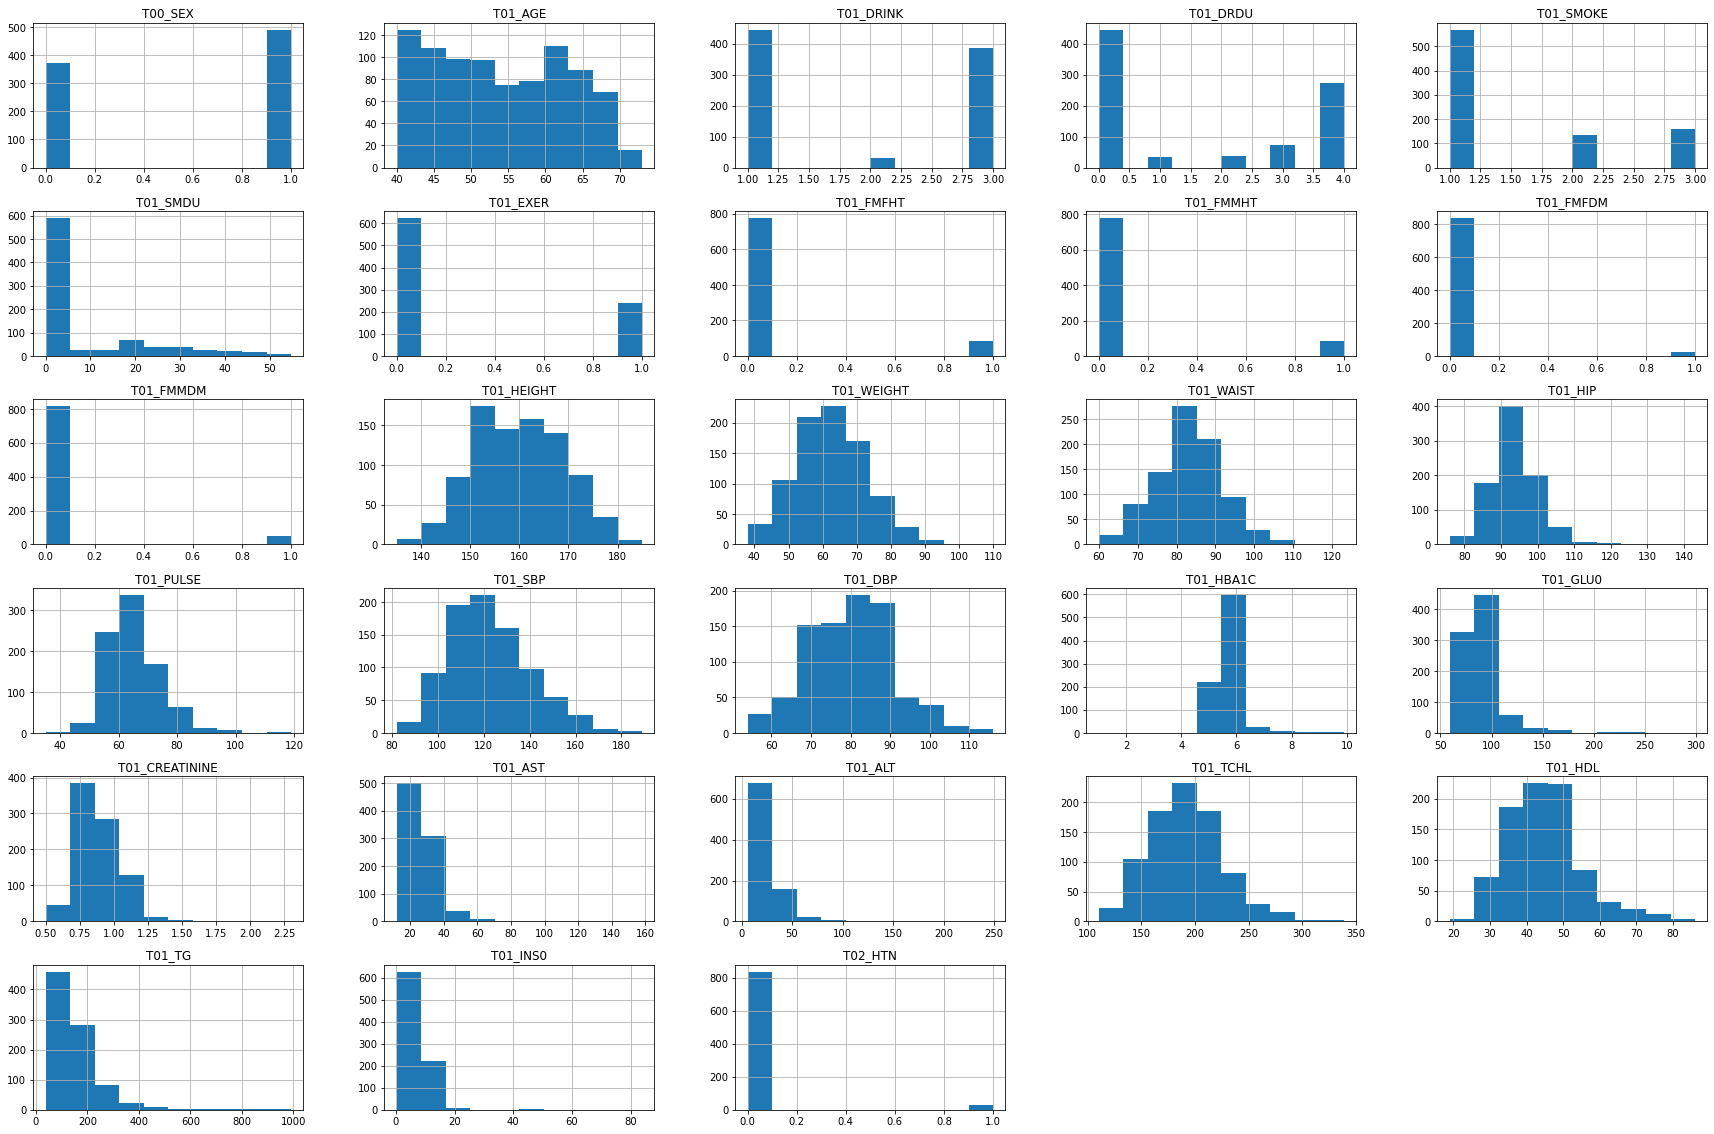

In [91]:
h = df5.iloc[1:,:].hist(figsize=(30,20))

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [93]:
X_train, X_test, y_train, y_test = train_test_split(df5[['T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
             'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
              'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0']], df5['T02_HTN'], random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(648, 27) (648,) (216, 27) (216,)


In [94]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [95]:
sm = SMOTE(random_state=42, sampling_strategy=0.5)

In [96]:
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape))

In [98]:
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After OverSampling, counts of label '1': 313
After OverSampling, counts of label '0': 626


In [99]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=1)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(751, 27) (751,) (188, 27) (188,)


In [110]:
y_train.value_counts()

0.0    501
1.0    250
Name: T02_HTN, dtype: int64

In [111]:
y_val.value_counts()

0.0    125
1.0     63
Name: T02_HTN, dtype: int64

In [100]:
from sklearn.svm import SVC

training_accuracy = []
validation_accuracy = []

C_settings = [0.01, 0.1, 1, 10, 100]      
gamma_settings = [0.01, 0.1, 0.5, 0.7, 1]

for C in C_settings:
    for gamma in gamma_settings:
        svc = SVC(C = C, kernel = 'rbf', gamma = gamma)
        svc.fit(X_train, y_train)

        # prediction
        y_train_hat = svc.predict(X_train)
        y_val_hat = svc.predict(X_val)
    
        # evluation
        training_accuracy.append(accuracy_score(y_train, y_train_hat))
        validation_accuracy.append(accuracy_score(y_val, y_val_hat))

In [101]:
result3 = pd.DataFrame({'C':sorted(C_settings*5), 'gamma':gamma_settings*5, 'training accuracy': training_accuracy, 'validation accuracy': validation_accuracy})

result3

,C,gamma,training accuracy,validation accuracy
0,0.01,0.01,0.667111,0.664894
1,0.01,0.10,0.667111,0.664894
2,0.01,0.50,0.667111,0.664894
3,0.01,0.70,0.667111,0.664894
4,0.01,1.00,0.667111,0.664894
5,0.10,0.01,0.667111,0.664894
6,0.10,0.10,0.667111,0.664894
7,0.10,0.50,0.667111,0.664894
8,0.10,0.70,0.667111,0.664894
9,0.10,1.00,0.667111,0.664894


In [102]:
y_val_hat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [103]:
max = result3['validation accuracy'].max()

print(max)

0.898936170212766


In [104]:
result3.loc[result3['validation accuracy'].idxmax()]

C                      10.000000
gamma                   0.010000
training accuracy       1.000000
validation accuracy     0.898936
Name: 15, dtype: float64

In [105]:
#svc = SVC(C=100)
#svc.fit(X_train, y_train)

SVC(C=100)

In [107]:
# model test
svc = SVC(C = 10, kernel = 'rbf', gamma = 0.01)
svc.fit(X_test, y_test)

# prediction
y_test_hat = svc.predict(X_test)

# evaluation
test_accuracy = accuracy_score(y_test, y_test_hat)

print("Accuracy on test set: ", test_accuracy)

Accuracy on test set:  1.0


In [108]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_test_hat)

array([[209,   0],
       [  0,   7]], dtype=int64)